In [2]:
# Task (3.1) (1)
import pandas as pd

''' 1. Load dataset '''
df = pd.read_csv("bank.csv")
print("First Output:\n")
print("Dataset Loaded Successfully")
print(df.head())

''' 2. Inspect DataFrame '''

''' (a) Columns with dtype = object '''
object_cols = df.select_dtypes(include='object').columns
print("\nSecond(a) Output: ")
print("\nColumns with dtype = object:")
print(object_cols)

''' (b) Unique values of object dtype columns '''
for col in object_cols:
    print("\nSecond(b) Output: ")
    print(f"\nColumn: {col}")
    print(df[col].unique())

''' (c) Total number of null values in each column '''
print("\nSecond(c) Output: ")
print("\nNull values in each column:")
print(df.isnull().sum())

''' 3. Drop object columns & save new numeric CSV '''
df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)
print("\n banknumericdata.csv created successfully!")
print("\nThird Output:\n ")
print(df_numeric.head())

''' 4. Read numeric CSV & find summary statistics '''
df_numeric_loaded = pd.read_csv("banknumericdata.csv")
print("\nFourth Output: ")
print("\nSummary Statistics of Numeric Data")
print(df_numeric_loaded.describe())


✔ Dataset Loaded Successfully
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Columns with dtype = object:
Index(['job', 'marital', 'education', 'default', 'h

In [9]:
#Task (3.1) (2)
''' 1. Load dataset '''
df = pd.read_csv("medical_students_dataset.csv")
print("First Output: \n")
print("Dataset Loaded Successfully")
print(df.head())

''' 2. Check info and identify columns with missing (null) values '''
print("\nSecond Output: ")
print("\nDataset Info:")
print(df.info())

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Identify columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]
print("\nColumns with missing values:")
print(missing_cols)

''' 3. Fill missing values using appropriate techniques '''
for col in missing_cols:
    if df[col].dtype == 'object':
        # Categorical column: fill missing values with mode
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_value} (categorical)")
    else:
        # Numeric column: fill missing values
        # Decide between mean and median
        if abs(df[col].skew()) < 0.5:
            # For nearly symmetric distribution, use mean
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
            print(f"Filled missing values in '{col}' with mean: {mean_value} (numeric, symmetric)")
        else:
            # For skewed distribution, use median
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Filled missing values in '{col}' with median: {median_value} (numeric, skewed)")
print("\nThird Output: ")
print("\nCheck missing values after filling:")
print(df.isnull().sum())

''' 4. Check for duplicates and manage them '''
# Total duplicate rows
total_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {total_duplicates}")

# Drop duplicates if any
if total_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New dataset shape: {df.shape}")
else:
    print("No duplicate rows found.")

# Optional: View final cleaned dataset
print("\nFourth Output: ")
print("\nCleaned Dataset Preview:")
print(df.head())


First Output: 

 Dataset Loaded Successfully
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  
Second Output: 

Dataset Info:
<class 'pandas.co

/tmp/ipython-input-896520659.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-896520659.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Filled missing values in 'Diabetes' with mode: No (categorical)
Filled missing values in 'Smoking' with mode: No (categorical)
Third Output: 

Check missing values after filling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Total duplicate rows: 12572
Duplicate rows removed. New dataset shape: (187428, 13)
Fourth Output: 

Cleaned Dataset Preview:
     Student ID        Age  Gender      Height     Weight Blood Type  \
0      1.000000  18.000000  Female  161.777924  72.354947          O   
1      2.000000  26.021561    Male  152.069157  47.630941          B   
2      3.000000  32.000000  Female  182.537664  55.741083          A   
3  49974.042078  30.000000    Male  182.112867  63.332207          B   
4      5.000000  23.000000  Female  174.947103  46.234173    

In [7]:
#Task(3.2) (1)
''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")  # Make sure titanic.csv is in working directory
print("First Output:\n")
print("Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Subset DataFrame for specific columns '''
subset_cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
titanic_subset = df[subset_cols]
print("\nSecond Output: ")
print("\nSubsetted DataFrame Preview:")
print(titanic_subset.head())

''' 3. Retain only rows where Pclass == 1 '''
first_class_passengers = titanic_subset[titanic_subset['Pclass'] == 1]
print("\nThird Output: ")
print(f"\nTotal first-class passengers: {first_class_passengers.shape[0]}")
print(first_class_passengers.head())

''' 4. Calculate statistics for the 'Fare' column '''
fare_mean = first_class_passengers['Fare'].mean()
fare_median = first_class_passengers['Fare'].median()
fare_max = first_class_passengers['Fare'].max()
fare_min = first_class_passengers['Fare'].min()

print("\nFourth Output: ")
print("\nFare Statistics for First-Class Passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")


First Output:

 Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4  

In [12]:
#Task(3.2) (2)
''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")
print("First Output:\n")
print("Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Subset DataFrame for specific columns '''
subset_cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
titanic_subset = df[subset_cols]
print("\nSecond Output:")
print("\nSubsetted DataFrame Preview:")
print(titanic_subset.head())

''' 3. Retain only rows where Pclass == 1 '''
first_class_passengers = titanic_subset[titanic_subset['Pclass'] == 1]
print("\nThird Output:")
print(f"\nTotal first-class passengers: {first_class_passengers.shape[0]}")
print(first_class_passengers.head())

''' 4. Check null values in 'Age' column '''
null_age_count = first_class_passengers['Age'].isnull().sum()
print("\nFourth Output:")
print(f"\nNumber of null values in 'Age' column: {null_age_count}")

''' 5. Drop rows with null 'Age' values '''
first_class_passengers_cleaned = first_class_passengers.dropna(subset=['Age'])
print("\nFifth Output:\n")
print(f"After dropping null 'Age' values, total rows: {first_class_passengers_cleaned.shape[0]}")
print(first_class_passengers_cleaned.head())


First Output:

Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

In [14]:
#Task (3.2) (3)
''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")
print("First Output:\n")
print("Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Check null values in 'Embarked' column '''
null_embarked_count = df['Embarked'].isnull().sum()
print("\nSecond Output:")
print(f"Number of null values in 'Embarked' column: {null_embarked_count}")

''' 3. Fill missing 'Embarked' values with mode (most common port) '''
if null_embarked_count > 0:
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)
    print("\nThird Output:")
    print(f"Filled missing 'Embarked' values with mode: {mode_embarked}")

''' 4. One-hot encode 'Embarked' column into separate binary columns '''
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
print("\nFourth Output:\n")
print("One-hot encoded 'Embarked' column added to DataFrame")

''' 5. Display the first few rows of the modified DataFrame '''
print("\nFifth Output:\n")
print("Modified DataFrame with one-hot encoded 'Embarked':")
print(df_encoded.head())


First Output:

Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

/tmp/ipython-input-2394383332.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


First Output:

✔ Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

/tmp/ipython-input-534710809.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_sex.index, y=mean_survival_by_sex.values, palette='pastel')


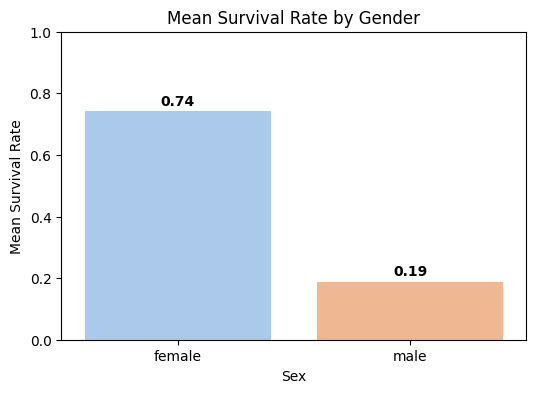


Fourth Output:

Bar plot displayed: Mean survival rate by gender


In [15]:
#Task (3.2) (4)
import matplotlib.pyplot as plt
import seaborn as sns

''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")
print("First Output:\n")
print("✔ Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Check the 'Sex' column and survival data '''
print("\nSecond Output:\n")
print("Unique values in 'Sex' column:", df['Sex'].unique())
print("Preview of 'Sex' and 'Survived' columns:")
print(df[['Sex', 'Survived']].head())

''' 3. Compute mean survival rate for each gender '''
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nThird Output:\n")
print("Mean survival rate by gender:")
print(mean_survival_by_sex)

''' 4. Visualize survival distribution by gender '''
plt.figure(figsize=(6,4))
sns.barplot(x=mean_survival_by_sex.index, y=mean_survival_by_sex.values, palette='pastel')
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)
for i, v in enumerate(mean_survival_by_sex.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
print("\nFourth Output:\n")
print("Bar plot displayed: Mean survival rate by gender")


First Output:

Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4   

/tmp/ipython-input-942997975.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)


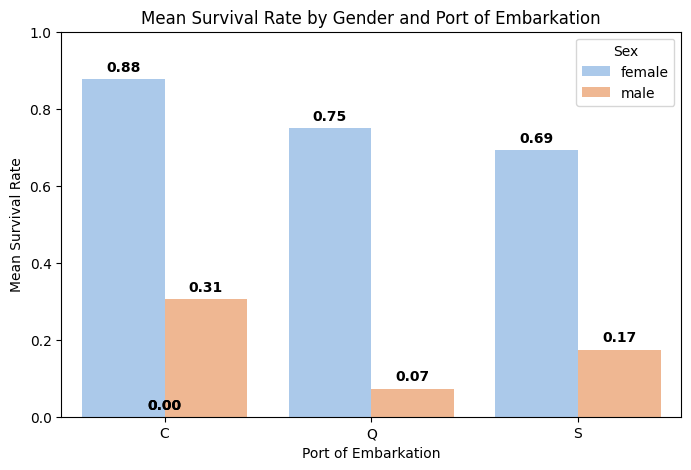


Fourth Output:

Bar plot displayed: Mean survival rate by gender and port of embarkation


In [20]:
#Task(3.2) (5)
''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")
print("First Output:\n")
print("Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Check and fill missing 'Embarked' values '''
null_embarked_count = df['Embarked'].isnull().sum()
print("\nSecond Output:")
print(f"Number of null values in 'Embarked' column: {null_embarked_count}")

if null_embarked_count > 0:
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)
    print(f"Filled missing 'Embarked' values with mode: {mode_embarked}")

''' 3. Compute mean survival rate by Sex and Embarked '''
mean_survival = df.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()
print("\nThird Output:\n")
print("Mean survival rate by Sex and Embarked:")
print(mean_survival)

''' 4. Visualize survival rate by Sex and Embarked '''
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Embarked', y='Survived', hue='Sex', data=mean_survival, palette='pastel')
plt.title('Mean Survival Rate by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)

# Correctly add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 0.02, s=f"{height:.2f}", ha='center', fontweight='bold')

plt.show()
print("\nFourth Output:\n")
print("Bar plot displayed: Mean survival rate by gender and port of embarkation")


First Output:

✔ Titanic Dataset Loaded Successfully
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4 

/tmp/ipython-input-2274412596.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['AgeGroup'] = pd.qcut(df_age['Age'], 5)
/tmp/ipython-input-2274412596.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival = df_age.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


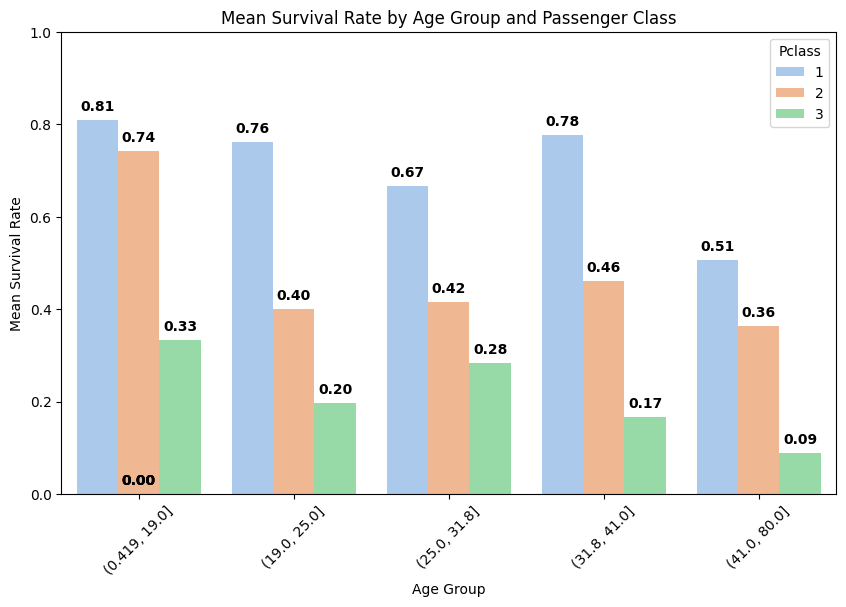


Fifth Output:

Bar plot displayed: Mean survival rate by AgeGroup and Pclass


In [21]:
#Task (3.2) (6)
''' 1. Load Titanic dataset '''
df = pd.read_csv("Titanic-Dataset.csv")
print("First Output:\n")
print("Titanic Dataset Loaded Successfully")
print(df.head())

''' 2. Handle missing 'Age' values by dropping or filling '''
null_age_count = df['Age'].isnull().sum()
print("\nSecond Output:")
print(f"Number of null values in 'Age' column: {null_age_count}")

# Drop rows with null Age for this analysis
df_age = df.dropna(subset=['Age'])
print(f"After dropping null 'Age' values, total rows: {df_age.shape[0]}")

''' 3. Create age groups using 5 quantiles '''
df_age['AgeGroup'] = pd.qcut(df_age['Age'], 5)
print("\nThird Output:\n")
print("Preview of 'Age' broken into 5 quantiles:")
print(df_age[['Age', 'AgeGroup']].head())

''' 4. Compute mean survival rate by Pclass and AgeGroup '''
mean_survival = df_age.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()
print("\nFourth Output:\n")
print("Mean survival rate by Pclass and AgeGroup:")
print(mean_survival)

''' 5. Visualize survival rates by Pclass and AgeGroup '''
plt.figure(figsize=(10,6))
ax = sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=mean_survival, palette='pastel')
plt.title('Mean Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)
plt.xticks(rotation=45)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 0.02, s=f"{height:.2f}", ha='center', fontweight='bold')

plt.show()
print("\nFifth Output:\n")
print("Bar plot displayed: Mean survival rate by AgeGroup and Pclass")
